In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from IPython.display import display_markdown

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
mergedList = movies.merge(ratings,on='movieId')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
mergedList.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [6]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

### Converting Object coloumn types to String datatype

In [7]:
g = list(movies.select_dtypes(np.object_).columns)
movies[g] = movies[g].astype('string')
movies.dtypes


movieId             int64
title      string[python]
genres     string[python]
dtype: object

### Spliting genres coloumn on basis of '|' for seperating values

In [8]:
a = movies['genres'].str.split('|').explode().tolist()
genres = pd.unique(np.array(a))
genres = genres.tolist()
genres.remove('(no genres listed)')


enter userId 1


{'Drama': 31, 'Comedy': 13, 'Romance': 12, 'Adventure': 6, 'Crime': 4, 'Thriller': 4, 'Sci-Fi': 3, 'War': 3, 'Musical': 3, 'Animation': 2, 'Children': 2, 'Fantasy': 2, 'Action': 2, 'Mystery': 1}


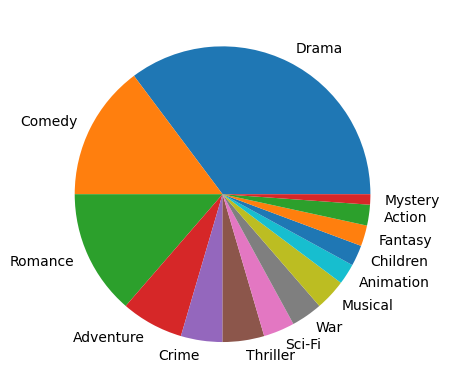

In [9]:
userId = int(input("enter userId"))
users = ratings[ratings['userId'].isin([userId])]
movIds = users[users['rating'].isin([4.0,4.5,5.0])]['movieId'].tolist()
watchHistory = movies[movies['movieId'].isin(movIds)]
genreWatchCount = {}
for item in genres:
    genreWatchCount[item] = 0
for item in watchHistory['genres']:
    for genre in genres:
        if genre in item:
            genreWatchCount[genre] = genreWatchCount[genre]+1
for k, v in genreWatchCount.copy().items():
    if v == 0:
        del genreWatchCount[k]
genreWatchCount = dict(sorted(genreWatchCount.items(),key = lambda x :x[1],reverse=True))
print(genreWatchCount)
recList  = []
for k,v in genreWatchCount.items():
    for i in range(v):
        recList.append(k)
movieList = []
movSel = mergedList[mergedList['rating'].isin([4.0,4.5,5.0])]

for x in range(3):
    tempGenre = random.choice(recList)
    GenreMovies = movSel[movSel['genres'].str.contains(tempGenre)]['title'].tolist()
    movieList.append(random.choice(GenreMovies))

plt.pie(list(genreWatchCount.values()),labels = list(genreWatchCount.keys()))
plt.show()


In [10]:
display_markdown(f" ## Recommendations: \n ### {movieList[0]} \n ### {movieList[1]} \n ### {movieList[2]} ", raw=True)


 ## Recommendations: 
 ### Four Weddings and a Funeral (1994) 
 ### Pelican Brief, The (1993) 
 ### Alien (1979) 

# 